In [1]:
import os
import pandas as pd
from config_file import data_path


In [2]:
df_sessions = pd.read_csv(os.path.join(data_path, 'sessions_timestamp_track.csv'))
df_sessions.head()

,timestamp,track_id
0,2020-10-21 20:41:02.953054,46JGVfEEiBScTaiP3Bnh27
1,2020-10-21 20:42:01.245054,6s8q3fQNcayP7yEFpuF3wz
2,2020-10-21 20:45:17.538054,3gs2PO5BKRG9oVUDvi59b2
3,2020-10-21 20:49:23.591054,0eNGwmFaIeEKQgudTcs1rV
4,2020-10-21 20:55:47.137054,2ifYUfvMNbXQDPJEyk68rP


In [3]:
df_sessions.shape

(13741737, 2)

23'613'691

13'741'737

In [4]:
df_tracks = pd.read_csv(os.path.join(data_path, 'tracks_ids.csv'))
df_tracks.head()

,id,id_artist
0,6C0WWu7RYKbAgWUI3YC0sT,7u710e44HW3K7A5eTnRqHC
1,4q7EBRq8ncztC2PRmEC7Fy,3sFhA6G1N0gG1pszb6kk1m
2,7cNyONpVADZVrW9xe3qq4z,7IAXZaLTb6nkJr8RmVPn5y
3,1bKRTzTFz7wHMxpgZSuPR1,5bOsFzuJ6QZMr86ezC4oXY
4,56OEjuyZ3AROnv4aR1XqhD,6zJ7WZkyTNmB1bFdmHH2k9


In [5]:
df_tracks.rename(columns={'id': 'track_id'}, inplace=True)
df_tracks.head()

,track_id,id_artist
0,6C0WWu7RYKbAgWUI3YC0sT,7u710e44HW3K7A5eTnRqHC
1,4q7EBRq8ncztC2PRmEC7Fy,3sFhA6G1N0gG1pszb6kk1m
2,7cNyONpVADZVrW9xe3qq4z,7IAXZaLTb6nkJr8RmVPn5y
3,1bKRTzTFz7wHMxpgZSuPR1,5bOsFzuJ6QZMr86ezC4oXY
4,56OEjuyZ3AROnv4aR1XqhD,6zJ7WZkyTNmB1bFdmHH2k9


In [6]:
df_tracks.columns, df_sessions.columns

(Index(['track_id', 'id_artist'], dtype='object'),
 Index(['timestamp', 'track_id'], dtype='object'))

In [7]:
df_session_artist = df_sessions.merge(df_tracks, on='track_id')
df_session_artist = df_session_artist[['timestamp', 'id_artist']]

In [8]:
df_session_artist.head()

,timestamp,id_artist
0,2020-10-21 20:41:02.953054,3WrFJ7ztbogyGnTHbHJFl2
1,2021-11-13 12:44:57.412048,3WrFJ7ztbogyGnTHbHJFl2
2,2022-01-15 04:24:33.756178,3WrFJ7ztbogyGnTHbHJFl2
3,2022-04-23 00:54:15.696817,3WrFJ7ztbogyGnTHbHJFl2
4,2022-05-10 13:27:02.447994,3WrFJ7ztbogyGnTHbHJFl2


In [9]:
df_session_artist.shape

(13741714, 2)

In [20]:
df_session_artist.to_csv(os.path.join(data_path, 'timestamp_artist.csv'), index=False)

In [10]:
df_artists = pd.read_csv(os.path.join(data_path, 'artists_ids.csv'))

In [11]:
len(df_session_artist['id_artist'].unique()), len(df_artists['id'].unique())

(794, 27650)

In [12]:
# plot the number of session per artist
session_counts = df_session_artist['id_artist'].value_counts()
df_session_counts = pd.DataFrame(session_counts)
df_session_counts

,count
id_artist,
4AK6F7OLvEQ5QYCBNiQWHq,280516
15UsOTVnJzReFVN1VCnxy4,210671
1dfeR4HaWDbWqFHLkxsg1d,189387
711MCceyCBcFnzjGY4Q7Un,172201
08GQAI4eElDnROBrJRGE0X,158724
...,...
2gFsmDBM0hkoZPmrO5EdyO,521
1uFixbBAduJkFAeRKznkvW,520
5MlEt7qqXqNSReeX76xK6b,517


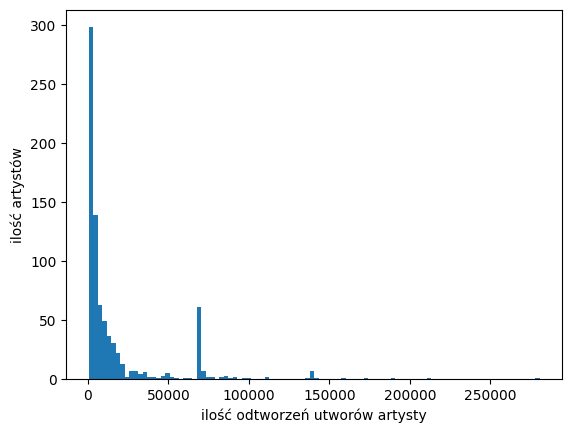

In [19]:

session_counts_list = df_session_counts['count'].tolist()
# hist plot session counts list
import matplotlib.pyplot as plt
plt.hist(session_counts_list, bins=100)
# describv axes
plt.xlabel('ilość odtworzeń utworów artysty')
plt.ylabel('ilość artystów')
plt.show()

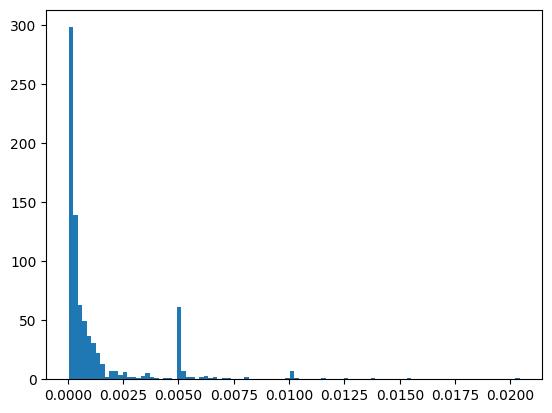

In [14]:
# normalize session counts list and plot
import numpy as np
session_counts_list_norm = np.array(session_counts_list)
session_counts_list_norm = session_counts_list_norm / session_counts_list_norm.sum()
plt.hist(session_counts_list_norm, bins=100)
plt.show()

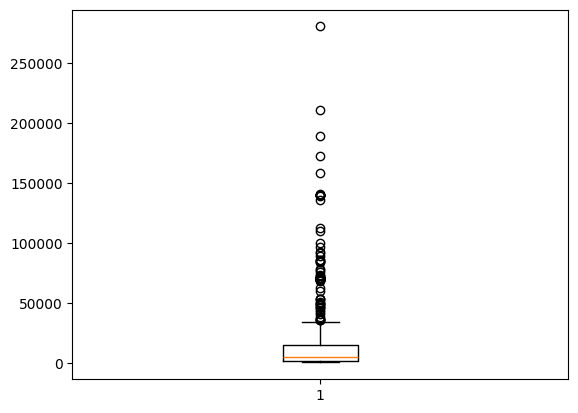

In [15]:
# box plot session counts list
plt.boxplot(session_counts_list)
plt.show()

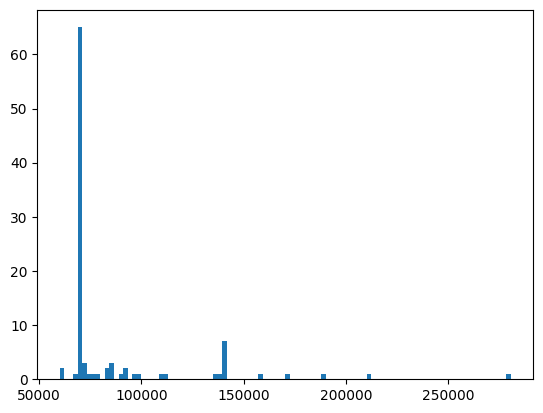

In [16]:
plt.hist(session_counts_list[:100], bins=100)
plt.show()

## summary
1. (794, 27650) - arists played in sessions and artists in the dataset
2. most of artists are played sporadically

In [22]:
# covert timestamp to datetime
df_session_artist['timestamp'] = pd.to_datetime(df_session_artist['timestamp'])

In [35]:
def get_sessions_per_week(artist_id: str, df: pd.DataFrame) -> pd.DataFrame:
    df_artist = df[df['id_artist'] == artist_id]
    df_artist['week'] = df_artist['timestamp'].dt.dayofyear // 7
    df_artist["week"] = df_artist["week"].astype(str).str.zfill(2)
    df_artist['year'] = df_artist['timestamp'].dt.year
    df_artist['year'] = df_artist['year'].astype(str)
    df_artist['year_week'] = df_artist['year'] + '_' + df_artist['week']
    df_artist = df_artist[['year_week', 'id_artist']]
    df_artist = df_artist.groupby('year_week').count()
    # sort by year_week desc
    df_artist.sort_index(ascending=False, inplace=True)
    # reverse index
    df_artist = df_artist.iloc[::-1]
    # df_artist.reset_index(inplace=True)
    df_artist.rename(columns={'id_artist': 'count'}, inplace=True)
    return df_artist

artist_weeks = get_sessions_per_week('3WrFJ7ztbogyGnTHbHJFl2', df_session_artist)
artist_weeks

/tmp/ipykernel_38717/3005153221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_artist['week'] = df_artist['timestamp'].dt.dayofyear // 7
/tmp/ipykernel_38717/3005153221.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_artist["week"] = df_artist["week"].astype(str).str.zfill(2)
/tmp/ipykernel_38717/3005153221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,count
year_week,
2019_27,3
2019_28,11
2019_29,10
2019_30,21
2019_31,40
...,...
2023_44,1146
2023_45,1226
2023_46,1210


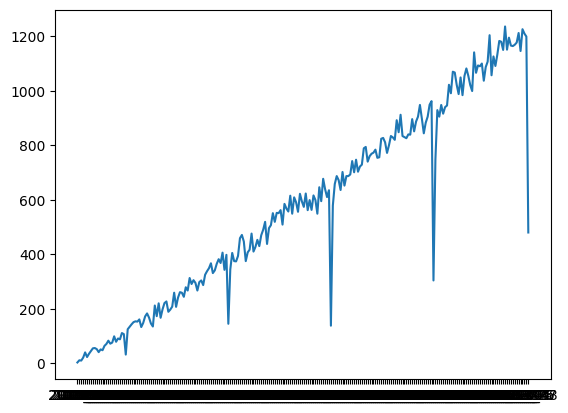

In [32]:
# plot sessions per week
plt.plot(artist_weeks['count'])
plt.show()

In [36]:
all_artists = df_session_artist['id_artist'].unique()
plays_per_week = [get_sessions_per_week(artist_id, df_session_artist) for artist_id in all_artists]

/tmp/ipykernel_38717/3005153221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_artist['week'] = df_artist['timestamp'].dt.dayofyear // 7
/tmp/ipykernel_38717/3005153221.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_artist["week"] = df_artist["week"].astype(str).str.zfill(2)
/tmp/ipykernel_38717/3005153221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

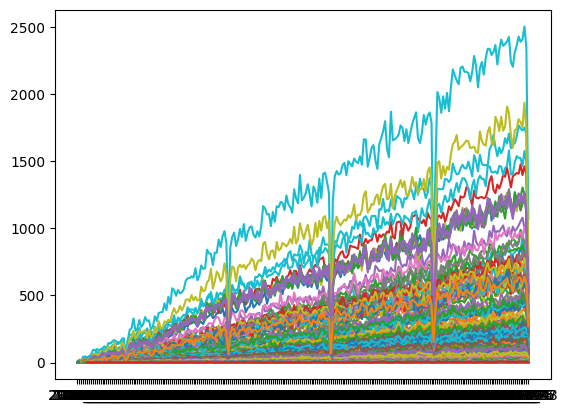

In [37]:
# plot sessions per week for all artists
for artist_weeks in plays_per_week:
    plt.plot(artist_weeks['count'])

In [39]:
# save to file plays per week 
os.makedirs(os.path.join(data_path, 'plays_per_week'), exist_ok=True)
for artist_weeks, artist_id in zip(plays_per_week, all_artists):
    artist_weeks.to_csv(os.path.join(data_path, 'plays_per_week', artist_id + '.csv'))